In [1]:
import pandas as pd
import pulse2percept as p2p

In [2]:
df = pd.read_parquet("datasets/MNIST/train.parquet")
df.shape

(60000, 2)

In [3]:
from PIL import Image
import io
import matplotlib.pyplot as plt

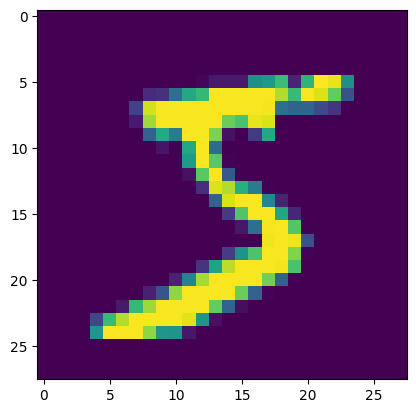

In [4]:
%matplotlib inline
image = Image.open(io.BytesIO(df["image"].iloc[0]['bytes']))
plt.imshow(image)

In [5]:
import numpy as np

In [6]:
img = np.array(image)

In [7]:
stim = p2p.stimuli.ImageStimulus(img)

<Axes: >

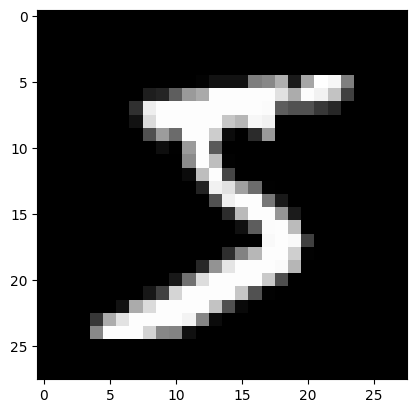

In [8]:
stim.plot()

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

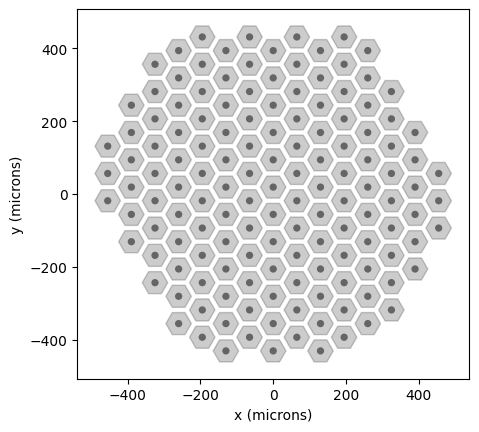

In [9]:
implant = p2p.implants.PRIMA75()
implant.plot()

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

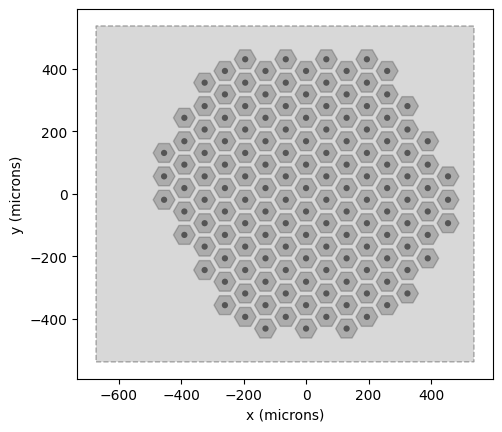

In [10]:
model = p2p.models.ScoreboardModel(xrange=(-2.5, 2), yrange=(-2, 2),
                                   rho=20, xystep=0.05)
model.build()
model.plot()
implant.plot()

In [11]:
implant.stim = stim.resize(implant.shape)

In [12]:
percept = model.predict_percept(implant)

In [13]:
frame = percept.max(axis='frames')
frame

array([[0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.],
       ...,
       [0., 0., ..., 0., 0.],
       [0., 0., ..., 0., 0.]], dtype=float32)

In [14]:
type(frame), type(img)

(numpy.ndarray, numpy.ndarray)

In [15]:
np.max(frame)

0.8940628

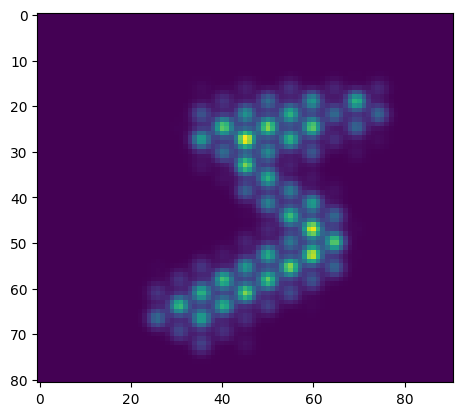

In [16]:
plt.imshow(frame)